# Semester 1 Project Submission
Please fill out:

Student name: Augusth Koppal 
<br>Instructor name: Nick & Julian<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

# Created Movie Gross dataframe from CSV file

In [3]:
df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# Created Movie Basics dataframe from SQL database

In [4]:
conn = sqlite3.connect('zippedData/im.db')
pd.read_sql("""SELECT * FROM movie_basics;""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


# Created Movie Ratings dataframe from SQL database

In [5]:
pd.read_sql("""SELECT * FROM movie_ratings;""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


# Created RT Movie Info dataframe from TSV file

In [6]:
df_2 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
df_2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# Created RT Reviews dataframe from TSV file

In [7]:
df_3 = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin')
df_3.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


# Created TMDB Movies dataframe from CSV file

In [8]:
df_4 = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df_4.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


# Created Movie Budgets dataframe from CSV file

In [10]:
df_5 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_5.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# TMDB Movies dataframe from CSV file

In [11]:
df_4 = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df_4

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [12]:
score = df_4["vote_average"]
score
#dropped all 0.0 values from vote_average score

0        7.7
1        7.7
2        6.8
3        7.9
4        8.3
        ... 
26512    0.0
26513    0.0
26514    0.0
26515    0.0
26516    0.0
Name: vote_average, Length: 26517, dtype: float64

In [13]:
df_4 = df_4.loc[~((df_4['vote_average'] == 0.0))]
df_4

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26500,26500,[],561932,en,Two,0.600,2018-02-04,Two,1.0,1
26501,26501,[27],558305,en,President Evil,0.600,2018-10-18,President Evil,1.0,1
26502,26502,[16],551756,en,Vicktey Vitch (It's Halloween Poem),0.600,2018-10-01,Vicktey Vitch (It's Halloween Poem),1.0,1
26503,26503,[99],543481,de,Evolution 4K,0.600,2018-06-12,Evolution 4K,1.0,1


In [15]:
#plot scatter chart showing distribution
df_4newvc = df_4.loc[df_4.vote_count>2500]
df_4newvc

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
23970,23970,"[35, 18, 10749]",449176,en,"Love, Simon",15.608,2018-03-16,"Love, Simon",8.2,3165
23971,23971,"[18, 36]",446354,en,The Post,15.551,2017-12-22,The Post,7.0,2506
23973,23973,[18],389015,en,"I, Tonya",15.407,2017-12-08,"I, Tonya",7.5,2904
23975,23975,"[18, 36]",399404,en,Darkest Hour,15.331,2017-11-22,Darkest Hour,7.3,2715


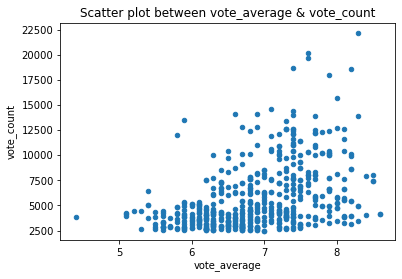

In [17]:
df_4newvc.plot.scatter(x='vote_average', y='vote_count', title= "Scatter plot between vote_average & vote_count");

# Created Movie Budgets dataframe from CSV file

In [19]:
df_5 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_5.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
#drop commas and $ for domestic_gross & worldwide_gross
df_5['domestic_gross'].dtypes


df_5['domestic_gross'] = df_5['domestic_gross'].str.replace(',', '')
df_5['domestic_gross'] = df_5['domestic_gross'].str.replace('$', '')
df_5['domestic_gross']

df_5['domestic_gross'] = pd.to_numeric(df_5['domestic_gross'])

In [21]:
type(df_5['domestic_gross'][0])

numpy.int64

In [22]:
#drop commas and $ for worldwide_gross
df_5['worldwide_gross'].dtypes


df_5['worldwide_gross'] = df_5['worldwide_gross'].str.replace(',', '')
df_5['worldwide_gross'] = df_5['worldwide_gross'].str.replace('$', '')
df_5['worldwide_gross']

df_5['worldwide_gross'] = pd.to_numeric(df_5['worldwide_gross'])

In [23]:
#drop years and month date for release_date
df_5.month = df_5['release_date'].map(lambda x: x[:3])
df_5.month

0       Dec
1       May
2       Jun
3       May
4       Dec
       ... 
5777    Dec
5778    Apr
5779    Jul
5780    Sep
5781    Aug
Name: release_date, Length: 5782, dtype: object

In [24]:
#divide release_date by 12 months

df_5.splitmonths = df_5.month.replace(to_replace={
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12
})

In [25]:
df_5.splitmonths

0       12
1        5
2        6
3        5
4       12
        ..
5777    12
5778     4
5779     7
5780     9
5781     8
Name: release_date, Length: 5782, dtype: int64

In [26]:
df_5.splitmonths.dropna()

0       12
1        5
2        6
3        5
4       12
        ..
5777    12
5778     4
5779     7
5780     9
5781     8
Name: release_date, Length: 5782, dtype: int64

In [27]:
df_5.splitmonths.value_counts()

12    745
10    573
8     496
9     493
11    486
6     479
3     470
4     454
7     440
5     407
2     392
1     347
Name: release_date, dtype: int64

In [28]:
df_5.splitmonths.unique()

array([12,  5,  6,  4, 11,  7,  3,  2, 10,  8,  9,  1], dtype=int64)

In [30]:
df_5['splitmonths'] = df_5.splitmonths
df_5.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,splitmonths
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,2776345279,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875,1045663875,5
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350,149762350,6
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868,1403013963,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382,1316721747,12


In [31]:
df_5['worldwide_gross']
df_5.worldwide_gross.value_counts()

0            367
8000000        9
7000000        6
2000000        6
4000000        4
            ... 
166000000      1
42843521       1
101173038      1
478595         1
12996          1
Name: worldwide_gross, Length: 5356, dtype: int64

In [32]:
# #plot domestic_gross & worldwide_gross totals by months

# fig, ax = plt.subplots(figsize=(12, 8))

# # Define bar width. We'll use this to offset the second bar.
# bar_width = 0.4

# # Note we add the `width` parameter now which sets the width of each bar.
# b1 = ax.bar(df_5.splitmonths, df_5['domestic_gross'])
# # Same thing, but offset the x by the width of the bar.
# b2 = ax.bar(df_5.splitmonths, df_5['worldwide_gross'])

<AxesSubplot:xlabel='release_date', ylabel='domestic_gross'>

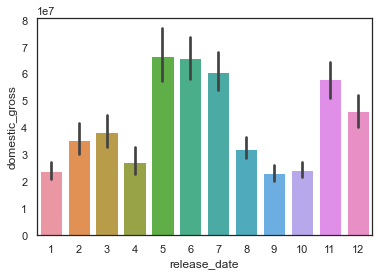

In [33]:
sns.set(style='white')

#create grouped bar chart
sns.barplot(x=df_5.splitmonths, y=df_5.domestic_gross, data=df_5)

<AxesSubplot:xlabel='release_date', ylabel='worldwide_gross'>

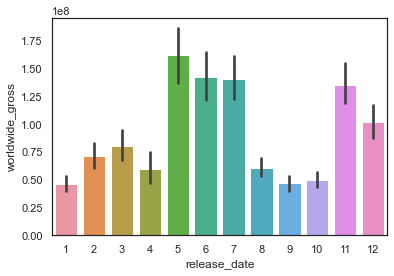

In [34]:
sns.barplot(x=df_5.splitmonths, y=df_5.worldwide_gross, data=df_5) 

https://www2.deloitte.com/us/en/insights/industry/technology/future-of-the-movie-industry.html

### Potential advantages or disadvantages for studios

1. theatres vs streaming directly
2. First 17 days of box office are crucial
3. longer a movie runs in theatres the more venues make and less that studios make
4. License fees are dependent on box office revenue
5. tv deals are are a potential additional source but require min box office revenue
6. Studios are relucatant to join digital services becuase of adverse affect on existing agreements(distribution, etc.)

https://www.rklesolutions.com/hubfs/RKL_eSolutions_Entertainment_eBook.pdf

1. Automate business processes to increase productivity
2. Empower teams with visibility into performance
3. Connect data across best-in-class applications 
4. Remove the distractions of IT
5. Work with a partner who knows your industry

In [28]:
# imdb_movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
# imdb_movie_basics.head()

In [29]:
# imdb_movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
# imdb_movie_ratings.head()

In [9]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
bom_movie_gross.year.head()

0    2010
1    2010
2    2010
3    2010
4    2010
Name: year, dtype: int64

In [11]:
rt_movies_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep = '\t')
rt_movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [12]:
rt_movies_info.dropna(inplace = True)

In [13]:
rt_movies_info['theater_date'].head()

1     Aug 17, 2012
6     Jan 11, 2002
7     Apr 27, 2006
15    Dec 17, 2010
18    Dec 25, 2013
Name: theater_date, dtype: object

In [14]:
rt_movies_info['year'] = rt_movies_info.theater_date
rt_movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,year
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,"Aug 17, 2012"
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,"Jan 11, 2002"
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,"Apr 27, 2006"
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures,"Dec 17, 2010"
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures,"Dec 25, 2013"


In [15]:
rt_movies_info.year = rt_movies_info.year.map(lambda x: x[-4:])

In [16]:
rt_movies_info.year = rt_movies_info.year.astype('int64')

In [17]:
rt_movies_info.year.head()

1     2012
6     2002
7     2006
15    2010
18    2013
Name: year, dtype: int64

# Merge the Tables by Year

In [38]:
merge_df = rt_movies_info.merge(bom_movie_gross, how = 'outer', left_on = 'year', right_on = 'year')

In [39]:
merge_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio_x,year,title,studio_y,domestic_gross,foreign_gross
0,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012,Marvel's The Avengers,BV,623400000.0,895500000
1,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012,Skyfall,Sony,304400000.0,804200000
2,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012,The Dark Knight Rises,WB,448100000.0,636800000
3,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012,The Hobbit: An Unexpected Journey,WB (NL),303000000.0,718100000
4,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,2012,Ice Age: Continental Drift,Fox,161300000.0,715900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,The Quake,Magn.,6200.0,NaN
38178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Edward II (2018 re-release),FM,4800.0,NaN
38179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,El Pacto,Sony,2500.0,NaN
38180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,The Swan,Synergetic,2400.0,NaN


In [19]:
rt_movies_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,year
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2012
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,2002
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,2006
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures,2010
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,"72,700,000",126 minutes,20th Century Fox,2011
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,"1,320,005",123 minutes,Buffalo Films,2016
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures,2005
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment,2012


In [48]:
rt_movies_info.studio.value_counts()

Universal Pictures       23
Paramount Pictures       15
20th Century Fox         12
Sony Pictures            12
Warner Bros. Pictures    11
                         ..
Universal                 1
USA Films                 1
Independent Pictures      1
Apparition Films          1
Screen Gems               1
Name: studio, Length: 101, dtype: int64

In [30]:
rt_movies_info.studio.unique()

array(['Entertainment One', 'Paramount Pictures',
       'Sony Pictures Classics', 'ATO Pictures', 'Universal Pictures',
       'MGM', 'Lions Gate Films', 'New Line Cinema',
       'Samuel Goldwyn Films', 'Open Road Films', 'Roadside Attractions',
       'Buena Vista Distribution Compa', 'Paramount Studios',
       '20th Century Fox', 'Fine Line Features', 'Warner Bros. Pictures',
       'Columbia Pictures', 'Dreamworks Pictures', 'Film District',
       'Reliance Entertainment', 'WARNER BROTHERS PICTURES',
       'DreamWorks SKG', 'Focus Features', 'IFC Films',
       'The Weinstein Company', 'Lions Gate Films Inc.',
       'Lionsgate Films', 'Magnolia Pictures', 'Sony Pictures',
       'Sony Classics', 'Wrekin Hill Entertainment', 'Weinstein Company',
       'Sony Pictures/TriStar Pictures', 'Aspiration Media',
       'Variance Films', 'MGM/UA', 'Film Foundry Releasing',
       'Walt Disney Pictures', 'Fox Searchlight Pictures', 'CBS Films',
       'Echolight Studios', 'Lionsgate/Roa

In [22]:
rt_movies_info.year.value_counts()

2010    18
2004    18
2007    17
2006    17
2013    16
2009    16
2012    15
2011    14
2005    14
2003    14
2002    14
2016    11
2008    10
2001     9
2015     9
2014     9
2017     7
2000     5
1993     1
1974     1
Name: year, dtype: int64

In [23]:
#line chart of most movies developed by studio each year

In [62]:
pd.Series(rt_movies_info['studio'].value_counts()).index[0:10].tolist()

['Universal Pictures',
 'Paramount Pictures',
 '20th Century Fox',
 'Sony Pictures',
 'Warner Bros. Pictures',
 'Sony Pictures Classics',
 'IFC Films',
 'New Line Cinema',
 'Lionsgate Films',
 'Columbia Pictures']

In [63]:
top_10 = pd.Series(rt_movies_info['studio'].value_counts()).index[0:10].tolist()

In [65]:
sns.lineplot(x=rt_movies_info.year, y=top_10)
plt.title('Most Movies Developed by Studio each Year')
plt.xlabel('Year')
plt.ylabel('Studio')
plt.show()

ValueError: array length 10 does not match index length 235

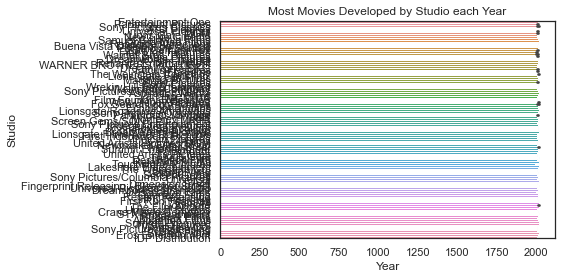

In [52]:
sns.barplot(x=rt_movies_info.year, y=rt_movies_info.studio)
plt.title('Most Movies Developed by Studio each Year')
plt.xlabel('Year')
plt.ylabel('Studio')
plt.show()

In [43]:
rt_movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,year
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,2012
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures,2002
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics,2006
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108 minutes,ATO Pictures,2010
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224,127 minutes,Universal Pictures,2013


In [26]:
# total box office revenue by each studio

In [35]:
#drop commas for box_office

rt_movies_info['box_office'].dtypes


rt_movies_info['box_office'] = rt_movies_info['box_office'].str.replace(',', '')
rt_movies_info['box_office']

rt_movies_info['box_office'] = pd.to_numeric(rt_movies_info['box_office'])

In [36]:
rt_movies_info['box_office']

1         600000
6       41032915
7         224114
15       1039869
18      20518224
          ...   
1530    72700000
1537     1320005
1541    25335935
1542     1416189
1545       59371
Name: box_office, Length: 235, dtype: int64

In [ ]:
# create new df to plot
# brs_1 = pd.rt_movies_info().assign(Box_Office=df['box_office'], Studio=df['studio'])
# print(brs_1)

In [49]:
# #set seaborn plotting aesthetics
# sns.set(style='white')
# #create stacked bar chart
# rt_movies_info.set_index(['year']).plot(kind='bar', stacked=True, color=['steelblue', 'red'])

# #add overall title
# plt.title('Box Office Revenue by Studio', fontsize=16)

# #add axis titles
# plt.xlabel('Studio')
# plt.ylabel('Box Office Revenue')

# #rotate x-axis labels
# plt.xticks(rotation=45)

In [ ]:
#top studios that performed domestic and foreign
#join table with 